In [59]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from datetime import datetime
import re

In [3]:
cab_data = pd.read_csv("C:/Users/filto/Desktop/data_glacier/DataSets/Cab_Data.csv")

In [4]:
city_data = pd.read_csv("C:/Users/filto/Desktop/data_glacier/DataSets/City.csv")

In [5]:
customer_data = pd.read_csv("C:/Users/filto/Desktop/data_glacier/DataSets/Customer_ID.csv")

In [6]:
transaction_data = pd.read_csv("C:/Users/filto/Desktop/data_glacier/DataSets/Transaction_ID.csv")

In [7]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [8]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [9]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [10]:
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [11]:
cab_data['Profit Margin'] = cab_data['Price Charged'] - cab_data['Cost of Trip']

In [12]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit Margin
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [13]:
int(city_data['Users'][0].strip().translate(str.maketrans('', '', string.punctuation)))

302149

In [14]:
def string_strip(s):
    return int(s.strip().translate(str.maketrans('', '', string.punctuation)))

In [15]:
city_data['Users'] = city_data['Users'].apply(string_strip)

In [16]:
city_data['Population'] = city_data['Population'].apply(string_strip)

In [17]:
city_data['Percentage Users'] = city_data['Users'] / city_data['Population']

In [18]:
datelist = pd.date_range(start="2016-01-31", end="2018-12-31")

In [19]:
dateSeries = pd.Series(datelist)
rangeSeries = pd.Series(range(42371,len(dateSeries)+42371))

In [20]:
date = pd.concat([dateSeries, rangeSeries], axis = 1)
date.rename(columns = {1: "Date of Travel"}, inplace = True)
date

,0,Date of Travel
0,2016-01-31,42371
1,2016-02-01,42372
2,2016-02-02,42373
3,2016-02-03,42374
4,2016-02-04,42375
...,...,...
1061,2018-12-27,43432
1062,2018-12-28,43433
1063,2018-12-29,43434
1064,2018-12-30,43435


In [21]:
cab_data['Date of Travel']

0         42377
1         42375
2         42371
3         42376
4         42372
          ...  
359387    43108
359388    43104
359389    43105
359390    43105
359391    43102
Name: Date of Travel, Length: 359392, dtype: int64

In [22]:
new_date = pd.merge(cab_data['Date of Travel'], date, how='left')
new_date

,Date of Travel,0
0,42377,2016-02-06
1,42375,2016-02-04
2,42371,2016-01-31
3,42376,2016-02-05
4,42372,2016-02-01
...,...,...
359387,43108,2018-02-06
359388,43104,2018-02-02
359389,43105,2018-02-03
359390,43105,2018-02-03


In [23]:
cab_data['Date of Travel'] = new_date[0]

In [24]:
cab_data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit Margin
359387,10440101,2018-02-06,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800
359388,10440104,2018-02-02,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020
359389,10440105,2018-02-03,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200
359390,10440106,2018-02-03,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420
359391,10440107,2018-01-31,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,13.9608


In [25]:
city_data.head()

,City,Population,Users,Percentage Users
0,NEW YORK NY,8405837,302149,0.035945
1,CHICAGO IL,1955130,164468,0.084121
2,LOS ANGELES CA,1595037,144132,0.090363
3,MIAMI FL,1339155,17675,0.013199
4,SILICON VALLEY,1177609,27247,0.023138


In [26]:
city_data = city_data[city_data['City'] != 'SAN FRANCISCO CA']
city_data.reset_index(drop=True, inplace=True)

In [27]:
city_data['Yellow Cab Avg Profit'] = [0] * len(city_data['City'])
city_data['Pink Cab Avg Profit'] = [0] * len(city_data['City'])

In [60]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
city_data['Yellow Cab Avg Profit'][0] = cab_data.loc[(cab_data['City'] == 'NEW YORK NY') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
city_data['Yellow Cab Avg Profit'][1] = cab_data.loc[(cab_data['City'] == 'CHICAGO IL') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
city_data['Yellow Cab Avg Profit'][2] = cab_data.loc[(cab_data['City'] == 'LOS ANGELES CA') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
city_data['Yellow Cab Avg Profit'][3] = cab_data.loc[(cab_data['City'] == 'MIAMI FL') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
city_data['Yellow Cab Avg Profit'][4] = cab_data.loc[(cab_data['City'] == 'SILICON VALLEY') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
city_data['Yellow Cab Avg Profit'][5] = cab_data.loc[(cab_data['City'] == 'ORANGE COUNTY') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
city_data['Yellow Cab Avg Profit'][6] = cab_data.loc[(cab_data['City'] == 'SAN DIEGO CA') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
city_data['Yellow Cab Avg Profit'][7] = cab_data.loc[(cab_data['City'] == 'PHOENIX AZ') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
city_data['Yellow Cab Avg Profit'][8] = cab_data.loc[(cab_data['City'] == 'DALLAS TX') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
city_data['Yellow Cab Avg Profit'][9] = cab_data.loc[(cab_data['City'] == 'ATLANTA GA') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
city_data['Yellow Cab Avg Profit'][10] = cab_data.loc[(cab_data['City'] == 'DENVER CO') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
city_data['Yellow Cab Avg Profit'][11] = cab_data.loc[(cab_data['City'] == 'AUSTIN TX') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
city_data['Yellow Cab Avg Profit'][12] = cab_data.loc[(cab_data['City'] == 'SEATTLE WA') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
city_data['Yellow Cab Avg Profit'][13] = cab_data.loc[(cab_data['City'] == 'TUCSON AZ') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
city_data['Yellow Cab Avg Profit'][14] = cab_data.loc[(cab_data['City'] == 'SACRAMENTO CA') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
city_data['Yellow Cab Avg Profit'][15] = cab_data.loc[(cab_data['City'] == 'PITTSBURGH PA') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
city_data['Yellow Cab Avg Profit'][16] = cab_data.loc[(cab_data['City'] == 'WASHINGTON DC') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
city_data['Yellow Cab Avg Profit'][17] = cab_data.loc[(cab_data['City'] == 'NASHVILLE TN') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
city_data['Yellow Cab Avg Profit'][18] = cab_data.loc[(cab_data['City'] == 'BOSTON MA') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()

C:\Users\filto\AppData\Local\Temp/ipykernel_7048/1277388581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Yellow Cab Avg Profit'][0] = cab_data.loc[(cab_data['City'] == 'NEW YORK NY') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
C:\Users\filto\AppData\Local\Temp/ipykernel_7048/1277388581.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Yellow Cab Avg Profit'][1] = cab_data.loc[(cab_data['City'] == 'CHICAGO IL') & (cab_data['Company'] == 'Yellow Cab')]['Profit Margin'].mean()
C:\Users\filto\AppData\Local\Temp/ipykernel_7048/1277388581.py:5: SettingWithCopyWarning: 
A va

In [61]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="A value is trying to be set on a copy of a slice from a DataFrame")
city_data['Pink Cab Avg Profit'][0] = cab_data.loc[(cab_data['City'] == 'NEW YORK NY') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
city_data['Pink Cab Avg Profit'][1] = cab_data.loc[(cab_data['City'] == 'CHICAGO IL') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
city_data['Pink Cab Avg Profit'][2] = cab_data.loc[(cab_data['City'] == 'LOS ANGELES CA') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
city_data['Pink Cab Avg Profit'][3] = cab_data.loc[(cab_data['City'] == 'MIAMI FL') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
city_data['Pink Cab Avg Profit'][4] = cab_data.loc[(cab_data['City'] == 'SILICON VALLEY') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
city_data['Pink Cab Avg Profit'][5] = cab_data.loc[(cab_data['City'] == 'ORANGE COUNTY') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
city_data['Pink Cab Avg Profit'][6] = cab_data.loc[(cab_data['City'] == 'SAN DIEGO CA') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
city_data['Pink Cab Avg Profit'][7] = cab_data.loc[(cab_data['City'] == 'PHOENIX AZ') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
city_data['Pink Cab Avg Profit'][8] = cab_data.loc[(cab_data['City'] == 'DALLAS TX') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
city_data['Pink Cab Avg Profit'][9] = cab_data.loc[(cab_data['City'] == 'ATLANTA GA') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
city_data['Pink Cab Avg Profit'][10] = cab_data.loc[(cab_data['City'] == 'DENVER CO') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
city_data['Pink Cab Avg Profit'][11] = cab_data.loc[(cab_data['City'] == 'AUSTIN TX') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
city_data['Pink Cab Avg Profit'][12] = cab_data.loc[(cab_data['City'] == 'SEATTLE WA') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
city_data['Pink Cab Avg Profit'][13] = cab_data.loc[(cab_data['City'] == 'TUCSON AZ') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
city_data['Pink Cab Avg Profit'][14] = cab_data.loc[(cab_data['City'] == 'SACRAMENTO CA') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
city_data['Pink Cab Avg Profit'][15] = cab_data.loc[(cab_data['City'] == 'PITTSBURGH PA') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
city_data['Pink Cab Avg Profit'][16] = cab_data.loc[(cab_data['City'] == 'WASHINGTON DC') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
city_data['Pink Cab Avg Profit'][17] = cab_data.loc[(cab_data['City'] == 'NASHVILLE TN') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
city_data['Pink Cab Avg Profit'][18] = cab_data.loc[(cab_data['City'] == 'BOSTON MA') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()

C:\Users\filto\AppData\Local\Temp/ipykernel_7048/3125084049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Pink Cab Avg Profit'][0] = cab_data.loc[(cab_data['City'] == 'NEW YORK NY') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
C:\Users\filto\AppData\Local\Temp/ipykernel_7048/3125084049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Pink Cab Avg Profit'][1] = cab_data.loc[(cab_data['City'] == 'CHICAGO IL') & (cab_data['Company'] == 'Pink Cab')]['Profit Margin'].mean()
C:\Users\filto\AppData\Local\Temp/ipykernel_7048/3125084049.py:5: SettingWithCopyWarning: 
A value is t

In [62]:
city_data.head(20)

,City,Population,Users,Percentage Users,Yellow Cab Avg Profit,Pink Cab Avg Profit
0,NEW YORK NY,8405837,302149,0.035945,307,108
1,CHICAGO IL,1955130,164468,0.084121,64,34
2,LOS ANGELES CA,1595037,144132,0.090363,116,56
3,MIAMI FL,1339155,17675,0.013199,133,81
4,SILICON VALLEY,1177609,27247,0.023138,206,89
5,ORANGE COUNTY,1030185,12994,0.012613,143,67
6,SAN DIEGO CA,959307,69995,0.072964,96,59
7,PHOENIX AZ,943999,6133,0.006497,131,41
8,DALLAS TX,942908,22157,0.023499,195,17
9,ATLANTA GA,814885,24701,0.030312,128,54


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'NEW YORK NY'),
  Text(1, 0, 'CHICAGO IL'),
  Text(2, 0, 'LOS ANGELES CA'),
  Text(3, 0, 'MIAMI FL'),
  Text(4, 0, 'SILICON VALLEY'),
  Text(5, 0, 'ORANGE COUNTY'),
  Text(6, 0, 'SAN DIEGO CA'),
  Text(7, 0, 'PHOENIX AZ'),
  Text(8, 0, 'DALLAS TX'),
  Text(9, 0, 'ATLANTA GA'),
  Text(10, 0, 'DENVER CO'),
  Text(11, 0, 'AUSTIN TX'),
  Text(12, 0, 'SEATTLE WA'),
  Text(13, 0, 'TUCSON AZ'),
  Text(14, 0, 'SACRAMENTO CA'),
  Text(15, 0, 'PITTSBURGH PA'),
  Text(16, 0, 'WASHINGTON DC'),
  Text(17, 0, 'NASHVILLE TN'),
  Text(18, 0, 'BOSTON MA')])

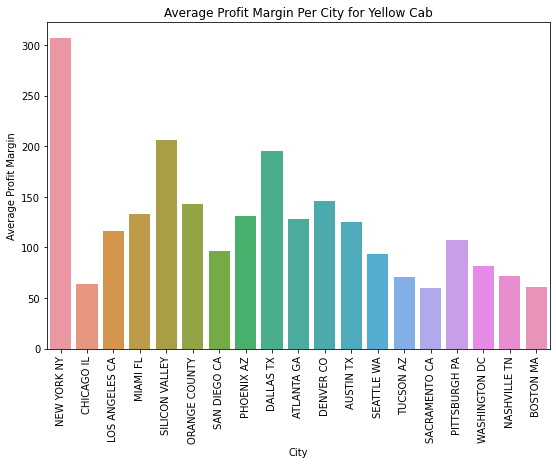

In [63]:
plt.figure(figsize=(9,6))

sns.barplot(x='City', y='Yellow Cab Avg Profit', data=city_data)
plt.title("Average Profit Margin Per City for Yellow Cab")
plt.xlabel("City")
plt.ylabel("Average Profit Margin")
plt.xticks(rotation="90")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'NEW YORK NY'),
  Text(1, 0, 'CHICAGO IL'),
  Text(2, 0, 'LOS ANGELES CA'),
  Text(3, 0, 'MIAMI FL'),
  Text(4, 0, 'SILICON VALLEY'),
  Text(5, 0, 'ORANGE COUNTY'),
  Text(6, 0, 'SAN DIEGO CA'),
  Text(7, 0, 'PHOENIX AZ'),
  Text(8, 0, 'DALLAS TX'),
  Text(9, 0, 'ATLANTA GA'),
  Text(10, 0, 'DENVER CO'),
  Text(11, 0, 'AUSTIN TX'),
  Text(12, 0, 'SEATTLE WA'),
  Text(13, 0, 'TUCSON AZ'),
  Text(14, 0, 'SACRAMENTO CA'),
  Text(15, 0, 'PITTSBURGH PA'),
  Text(16, 0, 'WASHINGTON DC'),
  Text(17, 0, 'NASHVILLE TN'),
  Text(18, 0, 'BOSTON MA')])

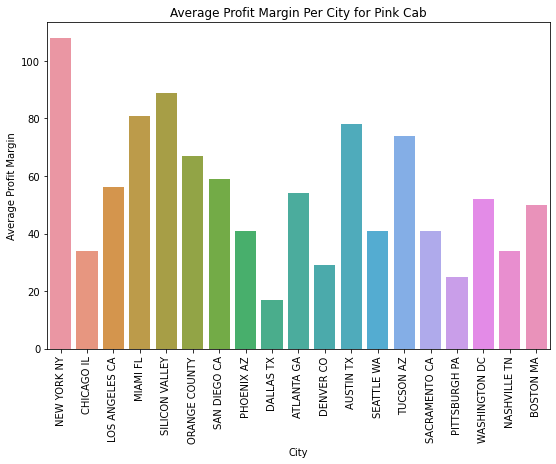

In [64]:
plt.figure(figsize=(9,6))
sns.barplot(x='City', y='Pink Cab Avg Profit', data=city_data)
plt.title("Average Profit Margin Per City for Pink Cab")
plt.xlabel("City")
plt.ylabel("Average Profit Margin")
plt.xticks(rotation="90")

Text(0, 0.5, 'Profit Margin')

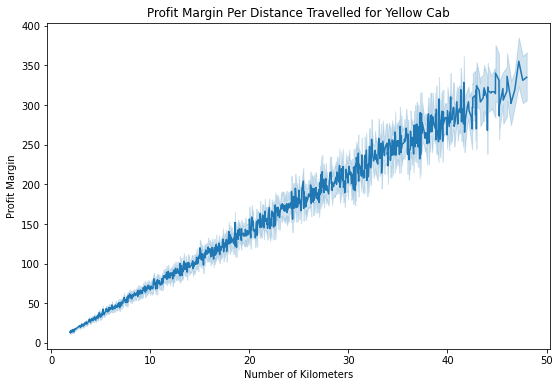

In [33]:
plt.figure(figsize=(9,6))
plt.title("Profit Margin Per Distance Travelled for Yellow Cab")
sns.lineplot(x='KM Travelled', y='Profit Margin', data=cab_data[cab_data['Company'] == 'Yellow Cab'])
plt.xlabel("Number of Kilometers")
plt.ylabel("Profit Margin")

Text(0, 0.5, 'Profit Margin')

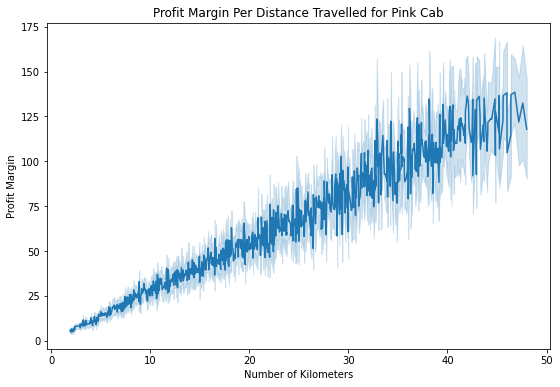

In [34]:
plt.figure(figsize=(9,6))
plt.title("Profit Margin Per Distance Travelled for Pink Cab")
sns.lineplot(x='KM Travelled', y='Profit Margin', data=cab_data[cab_data['Company'] == 'Pink Cab'])
plt.xlabel("Number of Kilometers")
plt.ylabel("Profit Margin")

Text(0, 0.5, 'Profit Margin')

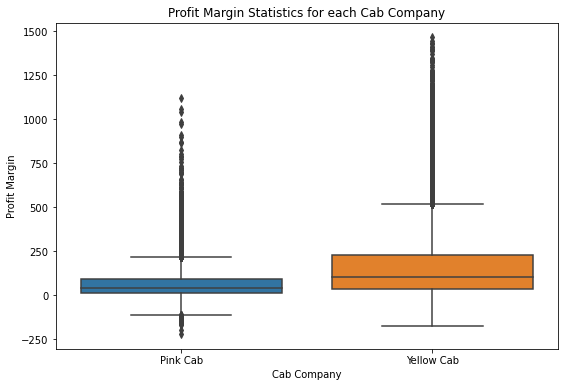

In [35]:
plt.figure(figsize=(9,6))
plt.title("Profit Margin Statistics for each Cab Company")
sns.boxplot(data=cab_data, x='Company', y='Profit Margin')
plt.xlabel("Cab Company")
plt.ylabel("Profit Margin")

In [37]:
cab_data2 = cab_data[cab_data['Date of Travel'].apply(str).str.match('\A2017')]

(array([17167., 17226., 17287., 17348., 17410., 17471., 17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

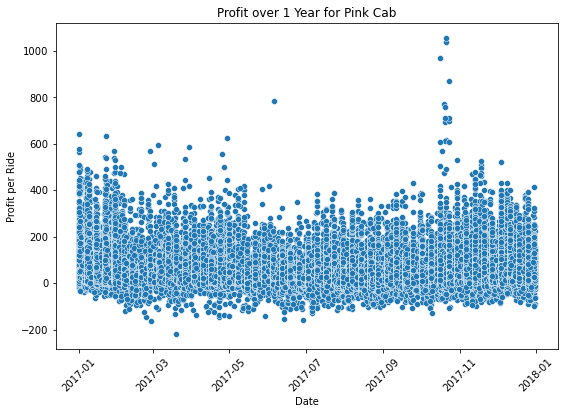

In [38]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='Date of Travel', y='Profit Margin', data=cab_data2[cab_data2['Company'] == 'Pink Cab'])
plt.title("Profit over 1 Year for Pink Cab")
plt.xlabel("Date")
plt.ylabel("Profit per Ride")
plt.xticks(rotation="45")

(array([17167., 17226., 17287., 17348., 17410., 17471., 17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

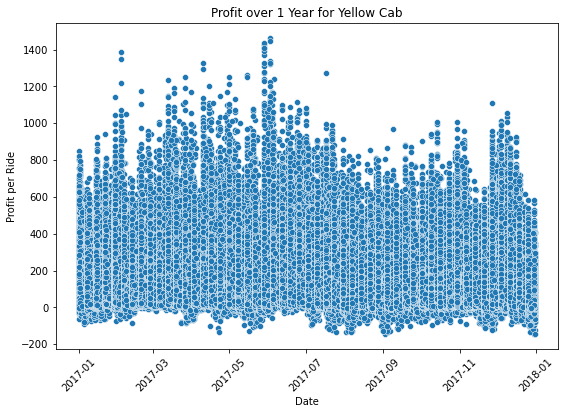

In [39]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='Date of Travel', y='Profit Margin', data=cab_data2[cab_data2['Company'] == 'Yellow Cab'],
               palette = ['yellow'])
plt.title("Profit over 1 Year for Yellow Cab")
plt.xlabel("Date")
plt.ylabel("Profit per Ride")
plt.xticks(rotation="45")

In [ ]:
type(cab_data['Date of Travel'].apply(str)[0])

In [ ]:
cab_data2[cab_data2['Company'] == 'Pink Cab']

In [41]:
transaction_data2 = pd.merge(transaction_data, cab_data)

In [42]:
transaction_data3 = pd.merge(transaction_data2, customer_data)

In [43]:
transaction_data3

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit Margin,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,Male,28,10813
1,10351127,29290,Cash,2018-08-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,Male,28,10813
2,10412921,29290,Card,2018-12-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,Male,28,10813
3,10000012,27703,Card,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,Male,27,9237
4,10320494,27703,Card,2018-05-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,2018-02-05,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656,Female,42,19417
359388,10439799,12490,Cash,2018-02-01,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980,Male,33,18713
359389,10439838,41414,Card,2018-02-02,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100,Male,38,3960
359390,10439840,41677,Cash,2018-02-04,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600,Male,23,19454


In [153]:
repeat_customer1 = transaction_data3['Customer ID'].value_counts()
df = pd.DataFrame(repeat_customer1)

In [154]:
df.index.names = ['Customer ID']
df.rename(columns={'Customer ID': 'Number of Trips'}, inplace=True)

In [155]:
df

,Number of Trips
Customer ID,
494,54
2939,53
2766,51
1070,51
858,50
...,...
54720,1
56479,1
55371,1


In [161]:
transaction_data4 = pd.merge(df, transaction_data3, on='Customer ID', how='inner')

In [162]:
transaction_data4.head()

,Customer ID,Number of Trips,Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit Margin,Gender,Age,Income (USD/Month)
0,494,54,10008282,Card,2016-03-12,Yellow Cab,NEW YORK NY,13.39,387.21,183.1752,204.0348,Male,18,18616
1,494,54,10008301,Cash,2016-03-12,Yellow Cab,NEW YORK NY,26.88,793.51,348.3648,445.1452,Male,18,18616
2,494,54,10008528,Cash,2016-03-14,Yellow Cab,NEW YORK NY,3.36,92.10,47.9808,44.1192,Male,18,18616
3,494,54,10013640,Cash,2016-04-03,Yellow Cab,NEW YORK NY,21.78,681.06,300.5640,380.4960,Male,18,18616
4,494,54,10017721,Cash,2016-04-13,Yellow Cab,NEW YORK NY,29.90,835.12,409.0320,426.0880,Male,18,18616


In [215]:
customer_count = transaction_data4.groupby('Customer ID')['Number of Trips'].count()
customer_count.index.names = ['Customer ID']
customer_count

Customer ID
Date of Travel    29
2                 40
3                 46
4                 26
5                 31
                  ..
59996              4
59997             10
59998              9
59999              8
60000             18
Name: Number of Trips, Length: 46148, dtype: int64

In [187]:
#sns.countplot(x='Company', data=transaction_data4[transaction_data4['Number of Trips'] == 1],
            #label="count", color="red")
sns.countplot(x='Company', data=customer_count[(customer_count > 1) & (customer_count < 6)],
              label="count", color="green")
plt.legend(ncol=2, loc="upper right", frameon=True)
plt.show()

ValueError: Could not interpret input 'Company'